RMS Error      alpha
0.659578817634 1.0
0.657861091881 0.1
0.657617214464 0.010000000000000002
0.657521648264 0.0010000000000000002
0.657419068011 0.00010000000000000002
0.657394162885 1.0000000000000003e-05
0.657391308716 1.0000000000000004e-06


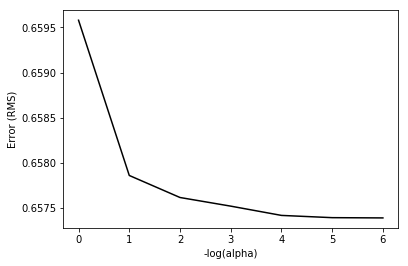

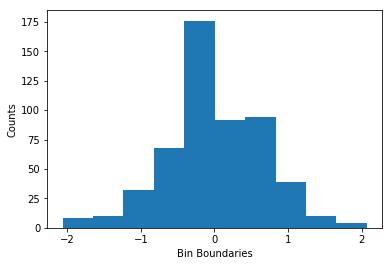

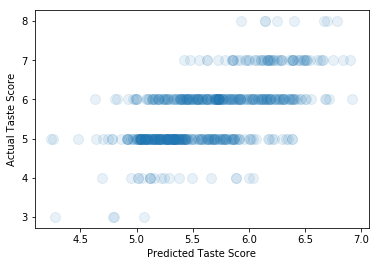

In [5]:
from urllib.request import urlopen 
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt

#read data into iterable
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    line = line.decode()
    if firstLine:
        names = line.strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)
        
#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain)
xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [0,1, 2, 3, 4, 5, 6]]

rmsError = []
for alph in alphaList:
    wineRidgeModel = linear_model.Ridge(alpha=alph)
    wineRidgeModel.fit(xTrain, yTrain)
    rmsError.append(numpy.linalg.norm((yTest-wineRidgeModel.predict(xTest)), 2)/sqrt(len(yTest)))
    
print("RMS Error      alpha")
for i in range(len(rmsError)):
    print(rmsError[i], alphaList[i])
    
#plot curve of out-of-sample error versus alpha
x = range(len(rmsError))
plt.plot(x, rmsError, 'k')
plt.xlabel('-log(alpha)')
plt.ylabel('Error (RMS)')
plt.show()

#Plot histogram of out of sample errors for best alpha value and
#scatter plot of actual versus predicted

#Identify index corresponding to min value, retrain with
#the corresponding value of alpha

#Use resulting model to predict against out of sample data.
#Plot errors (aka residuals)
indexBest = rmsError.index(min(rmsError))
alph = alphaList[indexBest]
wineRidgeModel = linear_model.Ridge(alpha=alph)
wineRidgeModel.fit(xTrain, yTrain)
errorVector = yTest-wineRidgeModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

plt.scatter(wineRidgeModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()